In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import data_outcomes as data
import data_models

# Dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import datetime
import numpy as np
from scipy.stats import zscore
import scipy.stats as stats

In [3]:
df = data.getDiabetesBehaviorDataframe()
display(df.head())

----> Retrieving information for Resources/diabetes_data.csv


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
models = [
        #LogisticRegression(random_state=42),
        #KNeighborsClassifier(n_neighbors=27),
        GradientBoostingClassifier(random_state=42, n_estimators=200),
        #AdaBoostClassifier(random_state=42, n_estimators=55, learning_rate=1.5),
        #DecisionTreeClassifier(random_state=42, max_features=10),
        RandomForestClassifier(random_state=1, n_estimators=100, max_depth=10, class_weight='balanced')
    ]

dict = data_models.model_selector(df, models)

------------ Running predictions for GradientBoostingClassifier(n_estimators=200, random_state=42)  --------------------
Testing all features
Adjusted R-squared: 0.7606427040625228
Testing dropping features
Adjusted R-squared: 0.7363863653053204
Returning all features
------------ Running predictions for RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=1)  --------------------
Testing all features
Adjusted R-squared: 0.7564690807680593
Testing dropping features
Adjusted R-squared: 0.7349259019552112
Returning all features


In [10]:
for mdl in dict:
    met = dict[mdl]
    print(f'----------------------------------------------------------------------------------------------')
    print(f'-----Model {met['model']}-------')
    print(f'----------------------------------------------------------------------------------------------')
    print(f'Training Score: {met['train_score']}')
    print(f'Testing Score:  {met['test_score']}')
    print(f'Accuracy:  {met['test_metrics']['accuracy']}')
    print(f'Confusion Matrix:  {met['test_metrics']['confusion_matrix']}')
    print(f'Balanced Accuracy Score:  {met['test_metrics']['balanced_accuracy_score']}')
    print(f'Classification Report:')

    print( '                 precision                     recall                      f1-score                   support')
    print(f'           0.0   {met['test_metrics']['classification_report']['1']['precision']}  \
          {met['test_metrics']['classification_report']['1']['recall']} \
        {met['test_metrics']['classification_report']['1']['f1-score']} \
        {met['test_metrics']['classification_report']['1']['support']}')
    
    print(f'           0.1   {met['test_metrics']['classification_report']['0']['precision']}  \
          {met['test_metrics']['classification_report']['0']['recall']} \
        {met['test_metrics']['classification_report']['0']['f1-score']} \
        {met['test_metrics']['classification_report']['0']['support']}')
    
    print(f'       macro avg   {met['test_metrics']['classification_report']['macro avg']['precision']}  \
          {met['test_metrics']['classification_report']['macro avg']['recall']} \
        {met['test_metrics']['classification_report']['macro avg']['f1-score']} \
        {met['test_metrics']['classification_report']['macro avg']['support']}')
    
    print(f'    weighted avg   {met['test_metrics']['classification_report']['weighted avg']['precision']}  \
          {met['test_metrics']['classification_report']['weighted avg']['recall']} \
        {met['test_metrics']['classification_report']['weighted avg']['f1-score']} \
        {met['test_metrics']['classification_report']['weighted avg']['support']}')

----------------------------------------------------------------------------------------------
-----Model <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>-------
----------------------------------------------------------------------------------------------
Training Score: 0.7682795512174789
Testing Score:  0.7609669688444306
Accuracy:  0.7609669688444306
Confusion Matrix:  [[3596 1007]
 [1287 3707]]
Balanced Accuracy Score:  0.7617601908734104
Classification Report:
                 precision                     recall                      f1-score                   support
           0.0   0.7364325209911939            0.7812296328481425         0.7581699346405228         4603.0
           0.1   0.7863809927874417            0.7422907488986784         0.7637000412031314         4994.0
       macro avg   0.7614067568893178            0.7617601908734104         0.7609349879218271         9597.0
    weighted avg   0.7624242546736427            0.7609669688444306         0.761047

In [26]:
randomforest = RandomForestClassifier(random_state=42, n_estimators=200)
X_train, X_test, y_train, y_test, pipeline = data_models.retrieve_model(df, randomforest)

------------ Running predictions for RandomForestClassifier(n_estimators=200, random_state=42)  --------------------
Testing all features
Adjusted R-squared: 0.72558426838903
Testing dropping features
Adjusted R-squared: 0.6954933915022675
Returning all features


In [11]:
gradientboost = GradientBoostingClassifier(random_state=42, n_estimators=200)
X_train, X_test, y_train, y_test, pipeline = data_models.retrieve_model(df, gradientboost)

------------ Running predictions for GradientBoostingClassifier(n_estimators=200, random_state=42)  --------------------
Testing all features
Adjusted R-squared: 0.7606427040625228
Testing dropping features
Adjusted R-squared: 0.7363863653053204
Returning all features


In [17]:
print(type(hasattr(met['model'], 'feature_importances_')))

<class 'bool'>


In [32]:
# plot gradient boosting feature importance
met = {
    #'model': gradientboost, randomforest
    'gradientboost': gradientboost,
    'randomforest': randomforest

}
feature_importance = met['model'].feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
#plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#5286ff')

plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

'''import matplotlib.pyplot as plt

feature_importances = gradientboost.feature_importances_
features = sorted(zip(X_train.columns, feature_importances), key = lambda x: x[1])
#features = np.arange(0, len(df.columns)-1)

plt.figure(figsize=(12, 6))
plt.pie(features,feature_importances)
plt.yticks(features, df.columns[0:12])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()'''


KeyError: 'model'

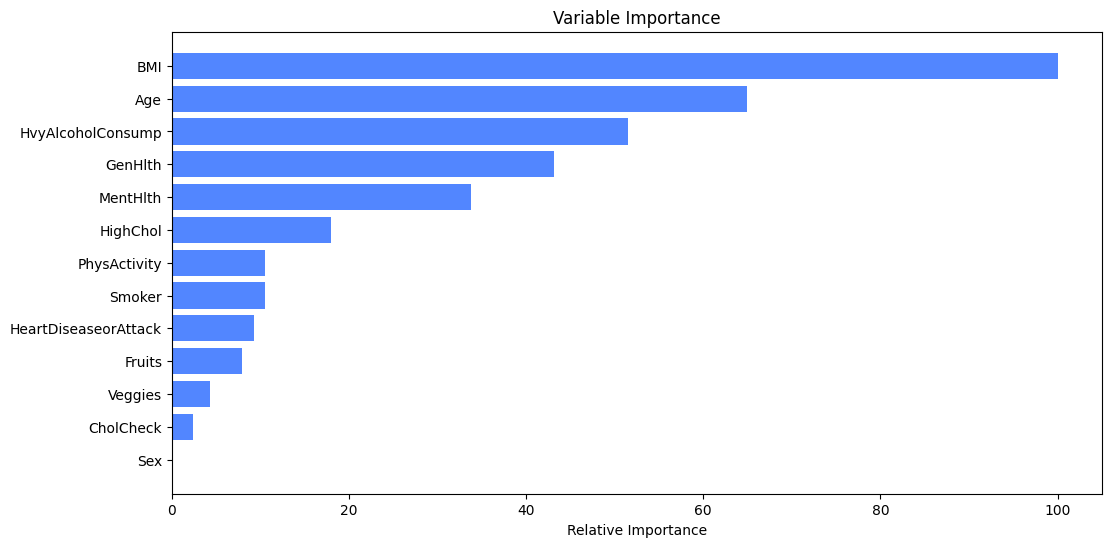

In [29]:
# plot random forest feature importance
met = {
    'model': randomforest,
}
feature_importance = met['model'].feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
#plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#5286ff')

plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


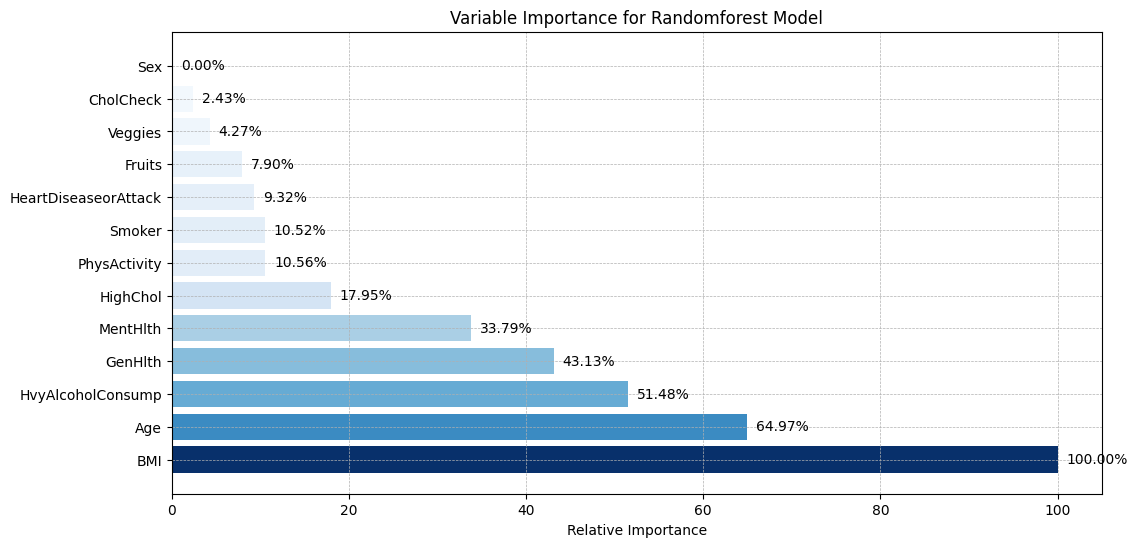

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define your models
met = {
    'gradientboost': gradientboost,
    'randomforest': randomforest
}

# Choose the model you want to visualize
model_name = 'randomforest'  # Change to 'randomforest' to switch models

# Check if the model supports feature importances
if not hasattr(met[model_name], 'feature_importances_'):
    raise ValueError(f"The selected model '{model_name}' does not support feature importances.")

# Get feature importances and make them relative to max importance
feature_importance = met[model_name].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + 0.5

# Plot
plt.figure(figsize=(12, 6))
colors = cm.Blues(feature_importance[sorted_idx] / 100.0)
plt.barh(pos, feature_importance[sorted_idx], align='center', color=colors)

# Add feature names on the y-axis
plt.yticks(pos, np.array(df.columns)[sorted_idx])

# Add labels for each bar
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v + 1, i + 0.5, f"{v:.2f}%", color='black', va='center')

# Improve aesthetics
plt.xlabel('Relative Importance')
plt.title(f'Variable Importance for {model_name.capitalize()} Model')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


C:\Users\azamora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


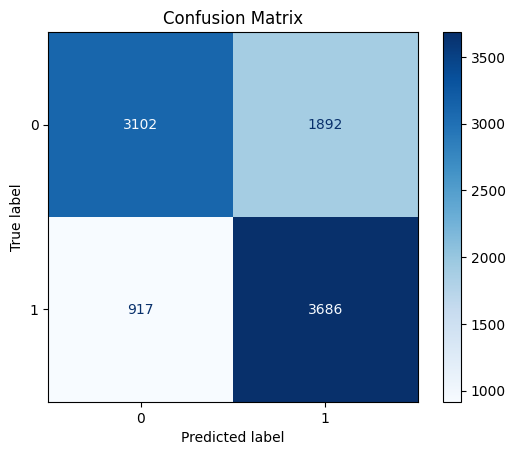

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assume y_test and y_pred are the true and predicted labels, respectively
y_pred = met['randomforest'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
